In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
profit_data = pd.read_csv("C:/mydata/50_Startups.csv")
profit_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
profit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
corr = profit_data.drop(columns=["State"])

In [10]:
corr.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


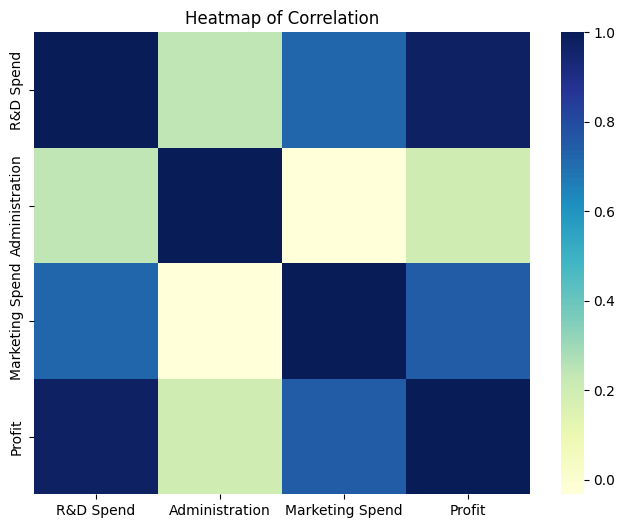

In [57]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr.corr(), annot=False, cmap="YlGnBu", fmt=".2f")

plt.title("Heatmap of Correlation")
plt.show()

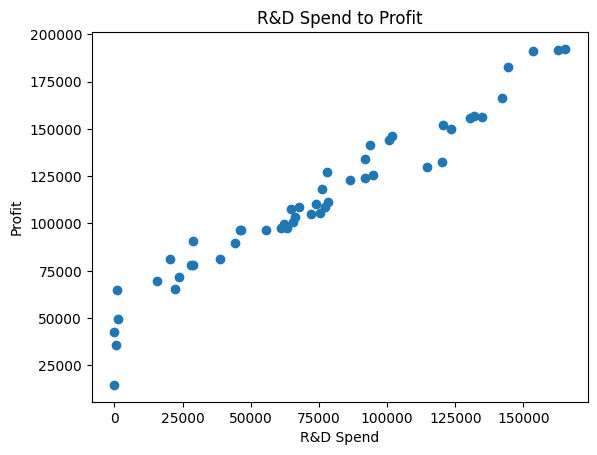

In [61]:
plt.scatter(corr['R&D Spend'], corr['Profit'])
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend to Profit")
plt.show()

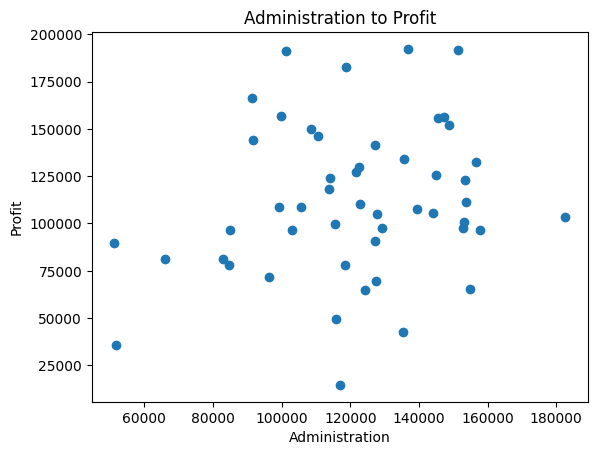

In [60]:
plt.scatter(corr['Administration'], corr['Profit'])
plt.ylabel("Profit")
plt.xlabel("Administration")
plt.title("Administration to Profit")
plt.show()

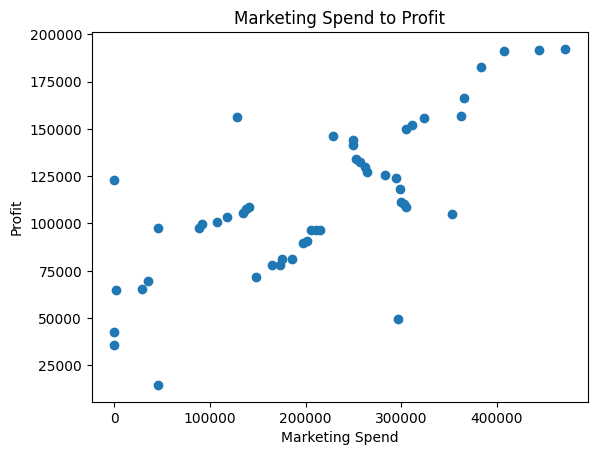

In [62]:
plt.scatter(corr['Marketing Spend'], corr['Profit'])
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend to Profit')
plt.show()

In [17]:
corr.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [26]:
x = corr[['R&D Spend','Marketing Spend']]
y = corr['Profit']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

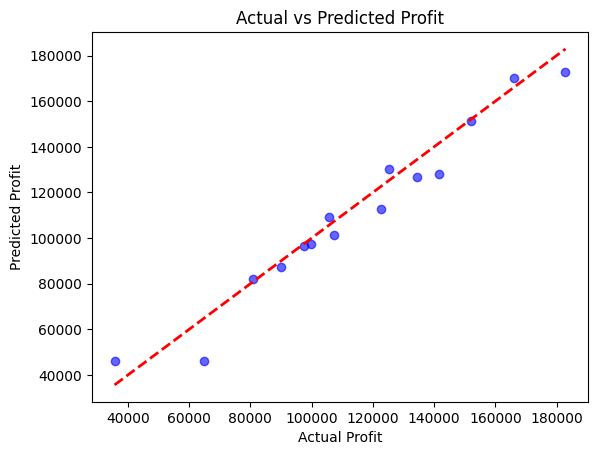

In [43]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Intercept: 45517.06073621359
Coefficients: [0.77738669 0.03888357]
Mean Squared Error: 66537675.84655431
R-squared: 0.9527095741745953


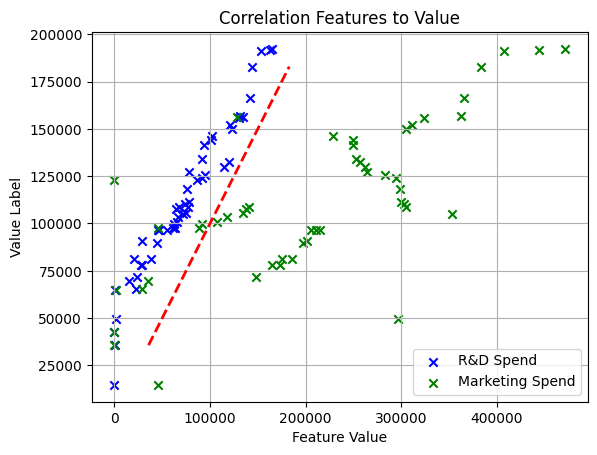

In [55]:
plt.scatter(corr['R&D Spend'], y, marker='x', color='blue', label='R&D Spend')
plt.scatter(corr['Marketing Spend'], y, marker='x', color='green', label='Marketing Spend')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)

plt.xlabel("Feature Value")
plt.ylabel("Value Label")
plt.title("Correlation Features to Value")

plt.legend()
plt.grid()
plt.show()

In [80]:
RD_Market = np.array([[140000, 271000]])
new_mode = model.predict(RD_Market)

print(f"R&D Spend is {RD_Market[0,0]}, Marketing Spend is {RD_Market[0,1]}, Prediction is {new_mode[0]:,.2f}")

R&D Spend is 140000, Marketing Spend is 271000, Prediction is 164,888.65


C:\Users\JOSHP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
